In [1]:
import numpy as np
import pandas as pd
import math
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # activate the Seaborn aesthetic defaults

## Summary

This notebook brings in tables with estimates of ghg emissions by source in "business-as-usual" and "meeting regional housing needs" scenarios, reorganizes that data so it can be graphed by year, and creates visualizations of the data.

## Outline
### Part A. Preparing data
1. Reorganize BAS table by year, aggregating Inner Bay and Outer Bay locations
2. Do the same for needs table
3. Merge tables together

### Part B. Visualizations
1. Create overall ghg comparison line graph
2. Create breakout ghg comparison line graph

## Part A1. Reorganize BAS table by year, aggregating Inner Bay and Outer Bay locations

In [3]:
#import BAS table
bas_df=pd.read_csv("bas_ghg.csv", delimiter=",")
bas_df.drop('Unnamed: 0', axis=1, inplace=True)
bas_df

,Place,County_x,15_total_VMT,16_total_VMT,17_total_VMT,18_total_VMT,15_vmt_ghg,16_vmt_ghg,17_vmt_ghg,18_vmt_ghg,2015_gas_usage,2016_gas_usage,2017_gas_usage,2018_gas_usage,2015_gas_ghg,2016_gas_ghg,2017_gas_ghg,2018_gas_ghg,15_electric_usage,16_electric_usage,17_electric_usage,18_electric_usage,15_electric_ghg,16_electric_ghg,17_electric_ghg,18_electric_ghg
0,"Alameda city, CA",Alameda,299300335.21,313705909.55,301087585.50,295975748.44,156173.82,163690.59,157106.40,154439.06,376868.74,389248.32,383439.17,368354.11,2001.17,2066.91,2036.06,1955.96,13205480.51,13639261.13,13435708.45,12907128.08,29075.69,21802.04,15389.89,14492.87
1,"Albany city, CA",Alameda,73717952.11,75010265.94,72711789.57,69608516.31,38465.76,39140.08,37940.74,36321.47,88521.48,89359.42,86371.99,84409.63,470.05,474.50,458.64,448.22,3101792.66,3131153.94,3026474.60,2957713.51,6829.50,5005.08,3466.67,3321.09
2,"American Canyon city, CA",Napa,68201984.88,68314746.91,66687579.99,65821029.87,35587.55,35646.38,34797.33,34345.17,64901.65,64518.41,62500.16,61888.02,344.63,342.59,331.88,328.63,3472373.59,3451869.24,3343888.98,3311138.00,7645.44,5517.73,3830.25,3717.94
3,"Antioch city, CA",Contra Costa,430142952.65,447422463.77,441900685.26,441984338.13,224447.01,233463.40,230582.15,230625.80,395544.97,405017.34,410374.54,409747.60,2100.34,2150.64,2179.09,2175.76,23530640.76,24094144.04,24412839.17,24375543.03,51809.53,38513.92,27963.61,27370.27
4,"Atherton town, CA",San Mateo,26460211.13,27611228.27,29102187.94,27630654.25,13806.84,14407.44,15185.41,14417.57,27281.77,28414.26,29613.28,28111.10,144.87,150.88,157.25,149.27,955953.29,995635.67,1037649.19,985013.08,2104.81,1591.50,1188.57,1106.03
5,"Atwater city, CA",Merced,102866439.59,101584731.21,104105563.96,111157817.85,53675.33,53006.54,54321.90,58001.74,111492.24,106612.43,110424.56,113713.28,592.02,566.11,586.35,603.82,6632580.45,6342284.50,6569065.29,6764708.50,14603.55,10137.99,7524.51,7595.81
6,"Atwater city, CA",Merced,102866439.59,101584731.21,104105563.96,111157817.85,53675.33,53006.54,54321.90,58001.74,111492.24,106612.43,110424.56,113713.28,592.02,566.11,586.35,603.82,6632580.45,6342284.50,6569065.29,6764708.50,14603.55,10137.99,7524.51,7595.81
7,"Auburn city, CA",Placer,60838999.75,60112943.70,65018093.11,63502651.51,31745.57,31366.71,33926.20,33135.45,nan,nan,nan,nan,nan,nan,nan,nan,3787921.70,3688936.44,3940727.52,3875337.26,8340.21,5896.68,4513.89,4351.45
8,"Belmont city, CA",San Mateo,132747184.04,127950576.72,132419268.45,126413259.47,69266.99,66764.14,69095.89,65961.97,136471.39,130787.14,134574.05,129042.72,724.66,694.48,714.59,685.22,4781957.58,4582781.25,4715474.64,4521656.91,10528.87,7325.47,5401.33,5077.18
9,"Belvedere city, CA",Marin,9128503.41,9390400.53,9242436.68,9340991.56,4763.22,4899.88,4822.67,4874.10,11657.86,11971.20,11664.38,11712.77,61.90,63.57,61.94,62.19,408491.27,419470.85,408720.02,410415.39,899.41,670.51,468.17,460.84


In [4]:
bay_mask = ((bas_df.County_x=="Alameda")|
            (bas_df.County_x=="Contra Costa")|
            (bas_df.County_x=="San Francisco")|
            (bas_df.County_x=="Santa Clara")|
            (bas_df.County_x=="San Mateo")|
            (bas_df.County_x=="Marin")|
            (bas_df.County_x=="Napa")|
            (bas_df.County_x=="Sonoma")|
            (bas_df.County_x=="Solano"))
bas_df["bay_dv"]=np.where(bay_mask,1,0)
bas_df

,Place,County_x,15_total_VMT,16_total_VMT,17_total_VMT,18_total_VMT,15_vmt_ghg,16_vmt_ghg,17_vmt_ghg,18_vmt_ghg,2015_gas_usage,2016_gas_usage,2017_gas_usage,2018_gas_usage,2015_gas_ghg,2016_gas_ghg,2017_gas_ghg,2018_gas_ghg,15_electric_usage,16_electric_usage,17_electric_usage,18_electric_usage,15_electric_ghg,16_electric_ghg,17_electric_ghg,18_electric_ghg,bay_dv
0,"Alameda city, CA",Alameda,299300335.21,313705909.55,301087585.50,295975748.44,156173.82,163690.59,157106.40,154439.06,376868.74,389248.32,383439.17,368354.11,2001.17,2066.91,2036.06,1955.96,13205480.51,13639261.13,13435708.45,12907128.08,29075.69,21802.04,15389.89,14492.87,1
1,"Albany city, CA",Alameda,73717952.11,75010265.94,72711789.57,69608516.31,38465.76,39140.08,37940.74,36321.47,88521.48,89359.42,86371.99,84409.63,470.05,474.50,458.64,448.22,3101792.66,3131153.94,3026474.60,2957713.51,6829.50,5005.08,3466.67,3321.09,1
2,"American Canyon city, CA",Napa,68201984.88,68314746.91,66687579.99,65821029.87,35587.55,35646.38,34797.33,34345.17,64901.65,64518.41,62500.16,61888.02,344.63,342.59,331.88,328.63,3472373.59,3451869.24,3343888.98,3311138.00,7645.44,5517.73,3830.25,3717.94,1
3,"Antioch city, CA",Contra Costa,430142952.65,447422463.77,441900685.26,441984338.13,224447.01,233463.40,230582.15,230625.80,395544.97,405017.34,410374.54,409747.60,2100.34,2150.64,2179.09,2175.76,23530640.76,24094144.04,24412839.17,24375543.03,51809.53,38513.92,27963.61,27370.27,1
4,"Atherton town, CA",San Mateo,26460211.13,27611228.27,29102187.94,27630654.25,13806.84,14407.44,15185.41,14417.57,27281.77,28414.26,29613.28,28111.10,144.87,150.88,157.25,149.27,955953.29,995635.67,1037649.19,985013.08,2104.81,1591.50,1188.57,1106.03,1
5,"Atwater city, CA",Merced,102866439.59,101584731.21,104105563.96,111157817.85,53675.33,53006.54,54321.90,58001.74,111492.24,106612.43,110424.56,113713.28,592.02,566.11,586.35,603.82,6632580.45,6342284.50,6569065.29,6764708.50,14603.55,10137.99,7524.51,7595.81,0
6,"Atwater city, CA",Merced,102866439.59,101584731.21,104105563.96,111157817.85,53675.33,53006.54,54321.90,58001.74,111492.24,106612.43,110424.56,113713.28,592.02,566.11,586.35,603.82,6632580.45,6342284.50,6569065.29,6764708.50,14603.55,10137.99,7524.51,7595.81,0
7,"Auburn city, CA",Placer,60838999.75,60112943.70,65018093.11,63502651.51,31745.57,31366.71,33926.20,33135.45,nan,nan,nan,nan,nan,nan,nan,nan,3787921.70,3688936.44,3940727.52,3875337.26,8340.21,5896.68,4513.89,4351.45,0
8,"Belmont city, CA",San Mateo,132747184.04,127950576.72,132419268.45,126413259.47,69266.99,66764.14,69095.89,65961.97,136471.39,130787.14,134574.05,129042.72,724.66,694.48,714.59,685.22,4781957.58,4582781.25,4715474.64,4521656.91,10528.87,7325.47,5401.33,5077.18,1
9,"Belvedere city, CA",Marin,9128503.41,9390400.53,9242436.68,9340991.56,4763.22,4899.88,4822.67,4874.10,11657.86,11971.20,11664.38,11712.77,61.90,63.57,61.94,62.19,408491.27,419470.85,408720.02,410415.39,899.41,670.51,468.17,460.84,1


In [5]:
bay_df = bas_df.groupby("bay_dv").sum()
bay_df

,15_total_VMT,16_total_VMT,17_total_VMT,18_total_VMT,15_vmt_ghg,16_vmt_ghg,17_vmt_ghg,18_vmt_ghg,2015_gas_usage,2016_gas_usage,2017_gas_usage,2018_gas_usage,2015_gas_ghg,2016_gas_ghg,2017_gas_ghg,2018_gas_ghg,15_electric_usage,16_electric_usage,17_electric_usage,18_electric_usage,15_electric_ghg,16_electric_ghg,17_electric_ghg,18_electric_ghg
bay_dv,,,,,,,,,,,,,,,,,,,,,,,,
0,26912648883.72,27220218203.39,27697710459.89,28056582464.84,14042921.32,14203409.87,14452563.57,14639821.67,12391304.29,12355770.06,12438284.76,12528864.32,65797.83,65609.14,66047.29,66528.27,1542987592.87,1549740279.37,1563677615.53,1578283097.60,3397334.65,2477223.19,1791109.53,1772187.68
1,31068420298.89,31364904716.36,31514276190.07,31526286455.16,16211387.58,16366092.06,16444033.55,16450300.46,32366181.77,32406812.27,32467142.39,32638070.26,171864.43,172080.17,172400.53,173308.15,1430341909.20,1434791391.52,1436400581.02,1443317371.04,3149312.51,2293480.11,1645320.46,1620640.35


In [6]:
#create a separate df for just 2015 numbers, relabeled by inner and outer bay
ghg_2015_df = bay_df[["15_total_VMT","15_vmt_ghg","2015_gas_usage","2015_gas_ghg","15_electric_usage","15_electric_ghg"]].copy()
bay_2015_df=ghg_2015_df.drop(0)
bay_2015_df.rename(columns={"15_total_VMT":"bas_bay_total_VMT","15_vmt_ghg":"bas_bay_vmt_ghg","2015_gas_usage":"bas_bay_gas_usage","2015_gas_ghg":"bas_bay_gas_ghg","15_electric_usage":"bas_bay_electric_usage","15_electric_ghg":"bas_bay_electric_ghg"},inplace = True)
bay_2015=bay_2015_df.reset_index()
bay_2015["bay_dv"]=2015
outer_2015_df=ghg_2015_df.drop(1)
outer_2015_df.rename(columns={"15_total_VMT":"bas_outer_total_VMT","15_vmt_ghg":"bas_outer_vmt_ghg","2015_gas_usage":"bas_outer_gas_usage","2015_gas_ghg":"bas_outer_gas_ghg","15_electric_usage":"bas_outer_electric_usage","15_electric_ghg":"bas_outer_electric_ghg"},inplace = True)
outer_2015 =outer_2015_df.reset_index()
outer_2015["bay_dv"]=2015
ghg_2015 = bay_2015.merge(outer_2015,how="left",on="bay_dv")
ghg_2015

,bay_dv,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_bay_gas_usage,bas_bay_gas_ghg,bas_bay_electric_usage,bas_bay_electric_ghg,bas_outer_total_VMT,bas_outer_vmt_ghg,bas_outer_gas_usage,bas_outer_gas_ghg,bas_outer_electric_usage,bas_outer_electric_ghg
0,2015,31068420298.89,16211387.58,32366181.77,171864.43,1430341909.20,3149312.51,26912648883.72,14042921.32,12391304.29,65797.83,1542987592.87,3397334.65


In [7]:
#create a separate df for just 2016 numbers, relabeled by inner and outer bay
ghg_2016_df = bay_df[["16_total_VMT","16_vmt_ghg","2016_gas_usage","2016_gas_ghg","16_electric_usage","16_electric_ghg"]].copy()
bay_2016_df=ghg_2016_df.drop(0)
bay_2016_df.rename(columns={"16_total_VMT":"bas_bay_total_VMT","16_vmt_ghg":"bas_bay_vmt_ghg","2016_gas_usage":"bas_bay_gas_usage","2016_gas_ghg":"bas_bay_gas_ghg","16_electric_usage":"bas_bay_electric_usage","16_electric_ghg":"bas_bay_electric_ghg"},inplace = True)
bay_2016=bay_2016_df.reset_index()
bay_2016["bay_dv"]=2016
outer_2016_df=ghg_2016_df.drop(1)
outer_2016_df.rename(columns={"16_total_VMT":"bas_outer_total_VMT","16_vmt_ghg":"bas_outer_vmt_ghg","2016_gas_usage":"bas_outer_gas_usage","2016_gas_ghg":"bas_outer_gas_ghg","16_electric_usage":"bas_outer_electric_usage","16_electric_ghg":"bas_outer_electric_ghg"},inplace = True)
outer_2016 =outer_2016_df.reset_index()
outer_2016["bay_dv"]=2016
ghg_2016 = bay_2016.merge(outer_2016,how="left",on="bay_dv")
ghg_2016

,bay_dv,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_bay_gas_usage,bas_bay_gas_ghg,bas_bay_electric_usage,bas_bay_electric_ghg,bas_outer_total_VMT,bas_outer_vmt_ghg,bas_outer_gas_usage,bas_outer_gas_ghg,bas_outer_electric_usage,bas_outer_electric_ghg
0,2016,31364904716.36,16366092.06,32406812.27,172080.17,1434791391.52,2293480.11,27220218203.39,14203409.87,12355770.06,65609.14,1549740279.37,2477223.19


In [8]:
#create a separate df for just 2017 numbers, relabeled by inner and outer bay
ghg_2017_df = bay_df[["17_total_VMT","17_vmt_ghg","2017_gas_usage","2017_gas_ghg","17_electric_usage","17_electric_ghg"]].copy()
bay_2017_df=ghg_2017_df.drop(0)
bay_2017_df.rename(columns={"17_total_VMT":"bas_bay_total_VMT","17_vmt_ghg":"bas_bay_vmt_ghg","2017_gas_usage":"bas_bay_gas_usage","2017_gas_ghg":"bas_bay_gas_ghg","17_electric_usage":"bas_bay_electric_usage","17_electric_ghg":"bas_bay_electric_ghg"},inplace = True)
bay_2017=bay_2017_df.reset_index()
bay_2017["bay_dv"]=2017
outer_2017_df=ghg_2017_df.drop(1)
outer_2017_df.rename(columns={"17_total_VMT":"bas_outer_total_VMT","17_vmt_ghg":"bas_outer_vmt_ghg","2017_gas_usage":"bas_outer_gas_usage","2017_gas_ghg":"bas_outer_gas_ghg","17_electric_usage":"bas_outer_electric_usage","17_electric_ghg":"bas_outer_electric_ghg"},inplace = True)
outer_2017 =outer_2017_df.reset_index()
outer_2017["bay_dv"]=2017
ghg_2017 = bay_2017.merge(outer_2017,how="left",on="bay_dv")
ghg_2017

,bay_dv,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_bay_gas_usage,bas_bay_gas_ghg,bas_bay_electric_usage,bas_bay_electric_ghg,bas_outer_total_VMT,bas_outer_vmt_ghg,bas_outer_gas_usage,bas_outer_gas_ghg,bas_outer_electric_usage,bas_outer_electric_ghg
0,2017,31514276190.07,16444033.55,32467142.39,172400.53,1436400581.02,1645320.46,27697710459.89,14452563.57,12438284.76,66047.29,1563677615.53,1791109.53


In [9]:
#create a separate df for just 2018 numbers, relabeled by inner and outer bay
ghg_2018_df = bay_df[["18_total_VMT","18_vmt_ghg","2018_gas_usage","2018_gas_ghg","18_electric_usage","18_electric_ghg"]].copy()
bay_2018_df=ghg_2018_df.drop(0)
bay_2018_df.rename(columns={"18_total_VMT":"bas_bay_total_VMT","18_vmt_ghg":"bas_bay_vmt_ghg","2018_gas_usage":"bas_bay_gas_usage","2018_gas_ghg":"bas_bay_gas_ghg","18_electric_usage":"bas_bay_electric_usage","18_electric_ghg":"bas_bay_electric_ghg"},inplace = True)
bay_2018=bay_2018_df.reset_index()
bay_2018["bay_dv"]=2018
outer_2018_df=ghg_2018_df.drop(1)
outer_2018_df.rename(columns={"18_total_VMT":"bas_outer_total_VMT","18_vmt_ghg":"bas_outer_vmt_ghg","2018_gas_usage":"bas_outer_gas_usage","2018_gas_ghg":"bas_outer_gas_ghg","18_electric_usage":"bas_outer_electric_usage","18_electric_ghg":"bas_outer_electric_ghg"},inplace = True)
outer_2018 =outer_2018_df.reset_index()
outer_2018["bay_dv"]=2018
ghg_2018 = bay_2018.merge(outer_2018,how="left",on="bay_dv")
ghg_2018

,bay_dv,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_bay_gas_usage,bas_bay_gas_ghg,bas_bay_electric_usage,bas_bay_electric_ghg,bas_outer_total_VMT,bas_outer_vmt_ghg,bas_outer_gas_usage,bas_outer_gas_ghg,bas_outer_electric_usage,bas_outer_electric_ghg
0,2018,31526286455.16,16450300.46,32638070.26,173308.15,1443317371.04,1620640.35,28056582464.84,14639821.67,12528864.32,66528.27,1578283097.60,1772187.68


In [10]:
# remerge years 2015 - 2018 together
frames = [ghg_2015,ghg_2016,ghg_2017,ghg_2018]
bas_ghg_years=pd.concat(frames,sort=True)
bas_ghg_years.rename(columns={"bay_dv":"year"},inplace=True)
bas_ghg_years

,bas_bay_electric_ghg,bas_bay_electric_usage,bas_bay_gas_ghg,bas_bay_gas_usage,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_outer_electric_ghg,bas_outer_electric_usage,bas_outer_gas_ghg,bas_outer_gas_usage,bas_outer_total_VMT,bas_outer_vmt_ghg,year
0,3149312.51,1430341909.20,171864.43,32366181.77,31068420298.89,16211387.58,3397334.65,1542987592.87,65797.83,12391304.29,26912648883.72,14042921.32,2015
0,2293480.11,1434791391.52,172080.17,32406812.27,31364904716.36,16366092.06,2477223.19,1549740279.37,65609.14,12355770.06,27220218203.39,14203409.87,2016
0,1645320.46,1436400581.02,172400.53,32467142.39,31514276190.07,16444033.55,1791109.53,1563677615.53,66047.29,12438284.76,27697710459.89,14452563.57,2017
0,1620640.35,1443317371.04,173308.15,32638070.26,31526286455.16,16450300.46,1772187.68,1578283097.60,66528.27,12528864.32,28056582464.84,14639821.67,2018


## Part A2. Do the same for needs scenario

In [11]:
#import needs table
needs_df=pd.read_csv("needs_ghg.csv", delimiter=",")
needs_df.drop('Unnamed: 0', axis=1, inplace=True)
needs_df

,Place,County_x,15_total_VMT,16_total_VMT,17_total_VMT,18_total_VMT,15_vmt_ghg,16_vmt_ghg,17_vmt_ghg,18_vmt_ghg,2015_gas_usage,2016_gas_usage,2017_gas_usage,2018_gas_usage,2015_gas_ghg,2016_gas_ghg,2017_gas_ghg,2018_gas_ghg,15_electric_usage,16_electric_usage,17_electric_usage,18_electric_usage,15_electric_ghg,16_electric_ghg,17_electric_ghg,18_electric_ghg
0,"Alameda city, CA",Alameda,339201356.14,332515725.58,328413288.13,334098248.12,176994.02,173505.48,171364.85,174331.24,422125.19,413828.52,416551.74,415295.09,2241.48,2197.43,2211.89,2205.22,14791266.59,14500551.34,14595972.97,14551939.88,32567.26,23178.79,16718.91,16339.76
1,"Albany city, CA",Alameda,75358653.86,79289953.56,77224809.21,75235871.14,39321.87,41373.21,40295.62,39257.80,90928.42,94657.27,92277.76,90977.95,482.83,502.63,489.99,483.09,3186131.70,3316790.81,3233412.57,3187867.44,7015.19,5301.81,3703.70,3579.52
2,"American Canyon city, CA",Napa,72703751.21,73292808.18,72091942.51,73438055.49,37936.55,38243.92,37617.31,38319.71,69599.39,70128.34,69237.49,70427.78,369.57,372.38,367.65,373.97,3723712.26,3752012.08,3704350.07,3768033.17,8198.83,5997.50,4243.14,4230.97
3,"Antioch city, CA",Contra Costa,479981026.17,494220993.04,469217084.52,470889081.01,250452.34,257882.70,244835.75,245708.19,445029.94,456014.68,435696.38,436305.42,2363.11,2421.44,2313.55,2316.78,26474460.03,27127933.06,25919214.80,25955445.85,58291.20,43363.36,29689.08,29144.28
4,"Atherton town, CA",San Mateo,30194917.91,30217885.50,30692322.52,29456457.07,15755.60,15767.58,16015.14,15370.27,30647.03,30760.12,31030.38,29733.46,162.74,163.34,164.77,157.88,1073871.86,1077834.46,1087304.52,1041860.30,2364.44,1722.89,1245.45,1169.86
5,"Atwater city, CA",Merced,121240425.59,101584731.21,104105563.96,111157817.85,63262.81,53006.54,54321.90,58001.74,127125.24,106612.43,110424.56,113713.28,675.04,566.11,586.35,603.82,7562574.59,6342284.50,6569065.29,6764708.50,16651.20,10137.99,7524.51,7595.81
6,"Atwater city, CA",Merced,121240425.59,101584731.21,104105563.96,111157817.85,63262.81,53006.54,54321.90,58001.74,127125.24,106612.43,110424.56,113713.28,675.04,566.11,586.35,603.82,7562574.59,6342284.50,6569065.29,6764708.50,16651.20,10137.99,7524.51,7595.81
7,"Auburn city, CA",Placer,68107584.74,60112943.70,65018093.11,63502651.51,35538.29,31366.71,33926.20,33135.45,nan,nan,nan,nan,nan,nan,nan,nan,4173835.67,3688936.44,3940727.52,3875337.26,9189.91,5896.68,4513.89,4351.45
8,"Belmont city, CA",San Mateo,133938510.63,133014937.94,140614991.91,134420026.20,69888.62,69406.71,73372.39,70139.88,138376.26,137708.23,144475.70,138982.03,734.78,731.23,767.17,737.99,4848704.15,4825296.45,5062428.67,4869930.40,10675.83,7713.12,5798.74,5468.24
9,"Belvedere city, CA",Marin,10223953.28,9833242.91,9665394.72,10120409.70,5334.82,5130.95,5043.37,5280.79,13020.80,12617.83,12331.98,12827.86,69.14,67.00,65.48,68.12,456248.97,442128.83,432112.58,449488.07,1004.56,706.73,494.96,504.71


In [12]:
bay_mask = ((needs_df.County_x=="Alameda")|
            (needs_df.County_x=="Contra Costa")|
            (needs_df.County_x=="San Francisco")|
            (needs_df.County_x=="Santa Clara")|
            (needs_df.County_x=="San Mateo")|
            (needs_df.County_x=="Marin")|
            (needs_df.County_x=="Napa")|
            (needs_df.County_x=="Sonoma")|
            (needs_df.County_x=="Solano"))
needs_df["bay_dv"]=np.where(bay_mask,1,0)
needs_df

,Place,County_x,15_total_VMT,16_total_VMT,17_total_VMT,18_total_VMT,15_vmt_ghg,16_vmt_ghg,17_vmt_ghg,18_vmt_ghg,2015_gas_usage,2016_gas_usage,2017_gas_usage,2018_gas_usage,2015_gas_ghg,2016_gas_ghg,2017_gas_ghg,2018_gas_ghg,15_electric_usage,16_electric_usage,17_electric_usage,18_electric_usage,15_electric_ghg,16_electric_ghg,17_electric_ghg,18_electric_ghg,bay_dv
0,"Alameda city, CA",Alameda,339201356.14,332515725.58,328413288.13,334098248.12,176994.02,173505.48,171364.85,174331.24,422125.19,413828.52,416551.74,415295.09,2241.48,2197.43,2211.89,2205.22,14791266.59,14500551.34,14595972.97,14551939.88,32567.26,23178.79,16718.91,16339.76,1
1,"Albany city, CA",Alameda,75358653.86,79289953.56,77224809.21,75235871.14,39321.87,41373.21,40295.62,39257.80,90928.42,94657.27,92277.76,90977.95,482.83,502.63,489.99,483.09,3186131.70,3316790.81,3233412.57,3187867.44,7015.19,5301.81,3703.70,3579.52,1
2,"American Canyon city, CA",Napa,72703751.21,73292808.18,72091942.51,73438055.49,37936.55,38243.92,37617.31,38319.71,69599.39,70128.34,69237.49,70427.78,369.57,372.38,367.65,373.97,3723712.26,3752012.08,3704350.07,3768033.17,8198.83,5997.50,4243.14,4230.97,1
3,"Antioch city, CA",Contra Costa,479981026.17,494220993.04,469217084.52,470889081.01,250452.34,257882.70,244835.75,245708.19,445029.94,456014.68,435696.38,436305.42,2363.11,2421.44,2313.55,2316.78,26474460.03,27127933.06,25919214.80,25955445.85,58291.20,43363.36,29689.08,29144.28,1
4,"Atherton town, CA",San Mateo,30194917.91,30217885.50,30692322.52,29456457.07,15755.60,15767.58,16015.14,15370.27,30647.03,30760.12,31030.38,29733.46,162.74,163.34,164.77,157.88,1073871.86,1077834.46,1087304.52,1041860.30,2364.44,1722.89,1245.45,1169.86,1
5,"Atwater city, CA",Merced,121240425.59,101584731.21,104105563.96,111157817.85,63262.81,53006.54,54321.90,58001.74,127125.24,106612.43,110424.56,113713.28,675.04,566.11,586.35,603.82,7562574.59,6342284.50,6569065.29,6764708.50,16651.20,10137.99,7524.51,7595.81,0
6,"Atwater city, CA",Merced,121240425.59,101584731.21,104105563.96,111157817.85,63262.81,53006.54,54321.90,58001.74,127125.24,106612.43,110424.56,113713.28,675.04,566.11,586.35,603.82,7562574.59,6342284.50,6569065.29,6764708.50,16651.20,10137.99,7524.51,7595.81,0
7,"Auburn city, CA",Placer,68107584.74,60112943.70,65018093.11,63502651.51,35538.29,31366.71,33926.20,33135.45,nan,nan,nan,nan,nan,nan,nan,nan,4173835.67,3688936.44,3940727.52,3875337.26,9189.91,5896.68,4513.89,4351.45,0
8,"Belmont city, CA",San Mateo,133938510.63,133014937.94,140614991.91,134420026.20,69888.62,69406.71,73372.39,70139.88,138376.26,137708.23,144475.70,138982.03,734.78,731.23,767.17,737.99,4848704.15,4825296.45,5062428.67,4869930.40,10675.83,7713.12,5798.74,5468.24,1
9,"Belvedere city, CA",Marin,10223953.28,9833242.91,9665394.72,10120409.70,5334.82,5130.95,5043.37,5280.79,13020.80,12617.83,12331.98,12827.86,69.14,67.00,65.48,68.12,456248.97,442128.83,432112.58,449488.07,1004.56,706.73,494.96,504.71,1


In [13]:
bay_df = needs_df.groupby("bay_dv").sum()
bay_df

,15_total_VMT,16_total_VMT,17_total_VMT,18_total_VMT,15_vmt_ghg,16_vmt_ghg,17_vmt_ghg,18_vmt_ghg,2015_gas_usage,2016_gas_usage,2017_gas_usage,2018_gas_usage,2015_gas_ghg,2016_gas_ghg,2017_gas_ghg,2018_gas_ghg,15_electric_usage,16_electric_usage,17_electric_usage,18_electric_usage,15_electric_ghg,16_electric_ghg,17_electric_ghg,18_electric_ghg
bay_dv,,,,,,,,,,,,,,,,,,,,,,,,
0,25913289355.77,24571008850.03,24801159662.96,24724666591.09,13521459.19,12821062.16,12941154.01,12901240.20,12715863.92,11951295.29,12005277.10,12088275.18,67521.24,63461.38,63748.02,64188.74,1491832370.74,1416245763.83,1417061502.97,1413779998.46,3284701.59,2263835.36,1623168.57,1587474.07
1,33876311490.42,33490877711.08,33931107047.19,34282094835.04,17676534.89,17475416.96,17705127.01,17888271.15,35203321.93,34859722.43,35241966.50,35670135.18,186929.64,185105.13,187134.84,189408.42,1558557676.25,1543377435.88,1560315807.25,1578571457.15,3431616.70,2467052.33,1787258.76,1772511.47


In [14]:
#create a separate df for just 2015 numbers, relabeled by inner and outer bay
ghg_2015_df = bay_df[["15_total_VMT","15_vmt_ghg","2015_gas_usage","2015_gas_ghg","15_electric_usage","15_electric_ghg"]].copy()
bay_2015_df=ghg_2015_df.drop(0)
bay_2015_df.rename(columns={"15_total_VMT":"needs_bay_total_VMT","15_vmt_ghg":"needs_bay_vmt_ghg","2015_gas_usage":"needs_bay_gas_usage","2015_gas_ghg":"needs_bay_gas_ghg","15_electric_usage":"needs_bay_electric_usage","15_electric_ghg":"needs_bay_electric_ghg"},inplace = True)
bay_2015=bay_2015_df.reset_index()
bay_2015["bay_dv"]=2015
outer_2015_df=ghg_2015_df.drop(1)
outer_2015_df.rename(columns={"15_total_VMT":"needs_outer_total_VMT","15_vmt_ghg":"needs_outer_vmt_ghg","2015_gas_usage":"needs_outer_gas_usage","2015_gas_ghg":"needs_outer_gas_ghg","15_electric_usage":"needs_outer_electric_usage","15_electric_ghg":"needs_outer_electric_ghg"},inplace = True)
outer_2015 =outer_2015_df.reset_index()
outer_2015["bay_dv"]=2015
ghg_2015 = bay_2015.merge(outer_2015,how="left",on="bay_dv")
ghg_2015

,bay_dv,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_bay_gas_usage,needs_bay_gas_ghg,needs_bay_electric_usage,needs_bay_electric_ghg,needs_outer_total_VMT,needs_outer_vmt_ghg,needs_outer_gas_usage,needs_outer_gas_ghg,needs_outer_electric_usage,needs_outer_electric_ghg
0,2015,33876311490.42,17676534.89,35203321.93,186929.64,1558557676.25,3431616.70,25913289355.77,13521459.19,12715863.92,67521.24,1491832370.74,3284701.59


In [15]:
#create a separate df for just 2016 numbers, relabeled by inner and outer bay
ghg_2016_df = bay_df[["16_total_VMT","16_vmt_ghg","2016_gas_usage","2016_gas_ghg","16_electric_usage","16_electric_ghg"]].copy()
bay_2016_df=ghg_2016_df.drop(0)
bay_2016_df.rename(columns={"16_total_VMT":"needs_bay_total_VMT","16_vmt_ghg":"needs_bay_vmt_ghg","2016_gas_usage":"needs_bay_gas_usage","2016_gas_ghg":"needs_bay_gas_ghg","16_electric_usage":"needs_bay_electric_usage","16_electric_ghg":"needs_bay_electric_ghg"},inplace = True)
bay_2016=bay_2016_df.reset_index()
bay_2016["bay_dv"]=2016
outer_2016_df=ghg_2016_df.drop(1)
outer_2016_df.rename(columns={"16_total_VMT":"needs_outer_total_VMT","16_vmt_ghg":"needs_outer_vmt_ghg","2016_gas_usage":"needs_outer_gas_usage","2016_gas_ghg":"needs_outer_gas_ghg","16_electric_usage":"needs_outer_electric_usage","16_electric_ghg":"needs_outer_electric_ghg"},inplace = True)
outer_2016 =outer_2016_df.reset_index()
outer_2016["bay_dv"]=2016
ghg_2016 = bay_2016.merge(outer_2016,how="left",on="bay_dv")
ghg_2016

,bay_dv,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_bay_gas_usage,needs_bay_gas_ghg,needs_bay_electric_usage,needs_bay_electric_ghg,needs_outer_total_VMT,needs_outer_vmt_ghg,needs_outer_gas_usage,needs_outer_gas_ghg,needs_outer_electric_usage,needs_outer_electric_ghg
0,2016,33490877711.08,17475416.96,34859722.43,185105.13,1543377435.88,2467052.33,24571008850.03,12821062.16,11951295.29,63461.38,1416245763.83,2263835.36


In [16]:
#create a separate df for just 2017 numbers, relabeled by inner and outer bay
ghg_2017_df = bay_df[["17_total_VMT","17_vmt_ghg","2017_gas_usage","2017_gas_ghg","17_electric_usage","17_electric_ghg"]].copy()
bay_2017_df=ghg_2017_df.drop(0)
bay_2017_df.rename(columns={"17_total_VMT":"needs_bay_total_VMT","17_vmt_ghg":"needs_bay_vmt_ghg","2017_gas_usage":"needs_bay_gas_usage","2017_gas_ghg":"needs_bay_gas_ghg","17_electric_usage":"needs_bay_electric_usage","17_electric_ghg":"needs_bay_electric_ghg"},inplace = True)
bay_2017=bay_2017_df.reset_index()
bay_2017["bay_dv"]=2017
outer_2017_df=ghg_2017_df.drop(1)
outer_2017_df.rename(columns={"17_total_VMT":"needs_outer_total_VMT","17_vmt_ghg":"needs_outer_vmt_ghg","2017_gas_usage":"needs_outer_gas_usage","2017_gas_ghg":"needs_outer_gas_ghg","17_electric_usage":"needs_outer_electric_usage","17_electric_ghg":"needs_outer_electric_ghg"},inplace = True)
outer_2017 =outer_2017_df.reset_index()
outer_2017["bay_dv"]=2017
ghg_2017 = bay_2017.merge(outer_2017,how="left",on="bay_dv")
ghg_2017

,bay_dv,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_bay_gas_usage,needs_bay_gas_ghg,needs_bay_electric_usage,needs_bay_electric_ghg,needs_outer_total_VMT,needs_outer_vmt_ghg,needs_outer_gas_usage,needs_outer_gas_ghg,needs_outer_electric_usage,needs_outer_electric_ghg
0,2017,33931107047.19,17705127.01,35241966.50,187134.84,1560315807.25,1787258.76,24801159662.96,12941154.01,12005277.10,63748.02,1417061502.97,1623168.57


In [17]:
#create a separate df for just 2018 numbers, relabeled by inner and outer bay
ghg_2018_df = bay_df[["18_total_VMT","18_vmt_ghg","2018_gas_usage","2018_gas_ghg","18_electric_usage","18_electric_ghg"]].copy()
bay_2018_df=ghg_2018_df.drop(0)
bay_2018_df.rename(columns={"18_total_VMT":"needs_bay_total_VMT","18_vmt_ghg":"needs_bay_vmt_ghg","2018_gas_usage":"needs_bay_gas_usage","2018_gas_ghg":"needs_bay_gas_ghg","18_electric_usage":"needs_bay_electric_usage","18_electric_ghg":"needs_bay_electric_ghg"},inplace = True)
bay_2018=bay_2018_df.reset_index()
bay_2018["bay_dv"]=2018
outer_2018_df=ghg_2018_df.drop(1)
outer_2018_df.rename(columns={"18_total_VMT":"needs_outer_total_VMT","18_vmt_ghg":"needs_outer_vmt_ghg","2018_gas_usage":"needs_outer_gas_usage","2018_gas_ghg":"needs_outer_gas_ghg","18_electric_usage":"needs_outer_electric_usage","18_electric_ghg":"needs_outer_electric_ghg"},inplace = True)
outer_2018 =outer_2018_df.reset_index()
outer_2018["bay_dv"]=2018
ghg_2018 = bay_2018.merge(outer_2018,how="left",on="bay_dv")
ghg_2018

,bay_dv,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_bay_gas_usage,needs_bay_gas_ghg,needs_bay_electric_usage,needs_bay_electric_ghg,needs_outer_total_VMT,needs_outer_vmt_ghg,needs_outer_gas_usage,needs_outer_gas_ghg,needs_outer_electric_usage,needs_outer_electric_ghg
0,2018,34282094835.04,17888271.15,35670135.18,189408.42,1578571457.15,1772511.47,24724666591.09,12901240.20,12088275.18,64188.74,1413779998.46,1587474.07


In [18]:
# remerge years 2015 - 2018 together
frames = [ghg_2015,ghg_2016,ghg_2017,ghg_2018]
needs_ghg_years=pd.concat(frames,sort=True)
needs_ghg_years.rename(columns={"bay_dv":"year"},inplace=True)
needs_ghg_years

,year,needs_bay_electric_ghg,needs_bay_electric_usage,needs_bay_gas_ghg,needs_bay_gas_usage,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_outer_electric_ghg,needs_outer_electric_usage,needs_outer_gas_ghg,needs_outer_gas_usage,needs_outer_total_VMT,needs_outer_vmt_ghg
0,2015,3431616.70,1558557676.25,186929.64,35203321.93,33876311490.42,17676534.89,3284701.59,1491832370.74,67521.24,12715863.92,25913289355.77,13521459.19
0,2016,2467052.33,1543377435.88,185105.13,34859722.43,33490877711.08,17475416.96,2263835.36,1416245763.83,63461.38,11951295.29,24571008850.03,12821062.16
0,2017,1787258.76,1560315807.25,187134.84,35241966.50,33931107047.19,17705127.01,1623168.57,1417061502.97,63748.02,12005277.10,24801159662.96,12941154.01
0,2018,1772511.47,1578571457.15,189408.42,35670135.18,34282094835.04,17888271.15,1587474.07,1413779998.46,64188.74,12088275.18,24724666591.09,12901240.20


## Part A3. Merge tables together

In [19]:
comparison_df = bas_ghg_years.merge(needs_ghg_years,how="left",on="year")
comparison_df

,bas_bay_electric_ghg,bas_bay_electric_usage,bas_bay_gas_ghg,bas_bay_gas_usage,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_outer_electric_ghg,bas_outer_electric_usage,bas_outer_gas_ghg,bas_outer_gas_usage,bas_outer_total_VMT,bas_outer_vmt_ghg,year,needs_bay_electric_ghg,needs_bay_electric_usage,needs_bay_gas_ghg,needs_bay_gas_usage,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_outer_electric_ghg,needs_outer_electric_usage,needs_outer_gas_ghg,needs_outer_gas_usage,needs_outer_total_VMT,needs_outer_vmt_ghg
0,3149312.51,1430341909.20,171864.43,32366181.77,31068420298.89,16211387.58,3397334.65,1542987592.87,65797.83,12391304.29,26912648883.72,14042921.32,2015,3431616.70,1558557676.25,186929.64,35203321.93,33876311490.42,17676534.89,3284701.59,1491832370.74,67521.24,12715863.92,25913289355.77,13521459.19
1,2293480.11,1434791391.52,172080.17,32406812.27,31364904716.36,16366092.06,2477223.19,1549740279.37,65609.14,12355770.06,27220218203.39,14203409.87,2016,2467052.33,1543377435.88,185105.13,34859722.43,33490877711.08,17475416.96,2263835.36,1416245763.83,63461.38,11951295.29,24571008850.03,12821062.16
2,1645320.46,1436400581.02,172400.53,32467142.39,31514276190.07,16444033.55,1791109.53,1563677615.53,66047.29,12438284.76,27697710459.89,14452563.57,2017,1787258.76,1560315807.25,187134.84,35241966.50,33931107047.19,17705127.01,1623168.57,1417061502.97,63748.02,12005277.10,24801159662.96,12941154.01
3,1620640.35,1443317371.04,173308.15,32638070.26,31526286455.16,16450300.46,1772187.68,1578283097.60,66528.27,12528864.32,28056582464.84,14639821.67,2018,1772511.47,1578571457.15,189408.42,35670135.18,34282094835.04,17888271.15,1587474.07,1413779998.46,64188.74,12088275.18,24724666591.09,12901240.20


In [20]:
#export it
comparison_df.to_csv("comparison_ghg.csv")

In [21]:
comparison_df["bas_total_vmt_ghg"]=comparison_df["bas_bay_vmt_ghg"]+comparison_df["bas_outer_vmt_ghg"]
comparison_df["bas_total_electric_ghg"]=comparison_df["bas_bay_electric_ghg"]+comparison_df["bas_outer_electric_ghg"]
comparison_df["bas_total_gas_ghg"]=comparison_df["bas_bay_gas_ghg"]+comparison_df["bas_outer_gas_ghg"]
comparison_df["bas_total_ghg"]=comparison_df["bas_total_vmt_ghg"]+comparison_df["bas_total_electric_ghg"]+comparison_df["bas_total_gas_ghg"]

comparison_df["needs_total_vmt_ghg"]=comparison_df["needs_bay_vmt_ghg"]+comparison_df["needs_outer_vmt_ghg"]
comparison_df["needs_total_electric_ghg"]=comparison_df["needs_bay_electric_ghg"]+comparison_df["needs_outer_electric_ghg"]
comparison_df["needs_total_gas_ghg"]=comparison_df["needs_bay_gas_ghg"]+comparison_df["needs_outer_gas_ghg"]
comparison_df["needs_total_ghg"]=comparison_df["needs_total_vmt_ghg"]+comparison_df["needs_total_electric_ghg"]+comparison_df["needs_total_gas_ghg"]

comparison_df

,bas_bay_electric_ghg,bas_bay_electric_usage,bas_bay_gas_ghg,bas_bay_gas_usage,bas_bay_total_VMT,bas_bay_vmt_ghg,bas_outer_electric_ghg,bas_outer_electric_usage,bas_outer_gas_ghg,bas_outer_gas_usage,bas_outer_total_VMT,bas_outer_vmt_ghg,year,needs_bay_electric_ghg,needs_bay_electric_usage,needs_bay_gas_ghg,needs_bay_gas_usage,needs_bay_total_VMT,needs_bay_vmt_ghg,needs_outer_electric_ghg,needs_outer_electric_usage,needs_outer_gas_ghg,needs_outer_gas_usage,needs_outer_total_VMT,needs_outer_vmt_ghg,bas_total_vmt_ghg,bas_total_electric_ghg,bas_total_gas_ghg,bas_total_ghg,needs_total_vmt_ghg,needs_total_electric_ghg,needs_total_gas_ghg,needs_total_ghg
0,3149312.51,1430341909.20,171864.43,32366181.77,31068420298.89,16211387.58,3397334.65,1542987592.87,65797.83,12391304.29,26912648883.72,14042921.32,2015,3431616.70,1558557676.25,186929.64,35203321.93,33876311490.42,17676534.89,3284701.59,1491832370.74,67521.24,12715863.92,25913289355.77,13521459.19,30254308.91,6546647.16,237662.25,37038618.32,31197994.09,6716318.30,254450.88,38168763.26
1,2293480.11,1434791391.52,172080.17,32406812.27,31364904716.36,16366092.06,2477223.19,1549740279.37,65609.14,12355770.06,27220218203.39,14203409.87,2016,2467052.33,1543377435.88,185105.13,34859722.43,33490877711.08,17475416.96,2263835.36,1416245763.83,63461.38,11951295.29,24571008850.03,12821062.16,30569501.93,4770703.30,237689.31,35577894.54,30296479.12,4730887.69,248566.50,35275933.32
2,1645320.46,1436400581.02,172400.53,32467142.39,31514276190.07,16444033.55,1791109.53,1563677615.53,66047.29,12438284.76,27697710459.89,14452563.57,2017,1787258.76,1560315807.25,187134.84,35241966.50,33931107047.19,17705127.01,1623168.57,1417061502.97,63748.02,12005277.10,24801159662.96,12941154.01,30896597.12,3436429.99,238447.82,34571474.93,30646281.02,3410427.33,250882.86,34307591.21
3,1620640.35,1443317371.04,173308.15,32638070.26,31526286455.16,16450300.46,1772187.68,1578283097.60,66528.27,12528864.32,28056582464.84,14639821.67,2018,1772511.47,1578571457.15,189408.42,35670135.18,34282094835.04,17888271.15,1587474.07,1413779998.46,64188.74,12088275.18,24724666591.09,12901240.20,31090122.13,3392828.03,239836.42,34722786.58,30789511.35,3359985.54,253597.16,34403094.06


## Part B1. Create overall ghg comparison line graph

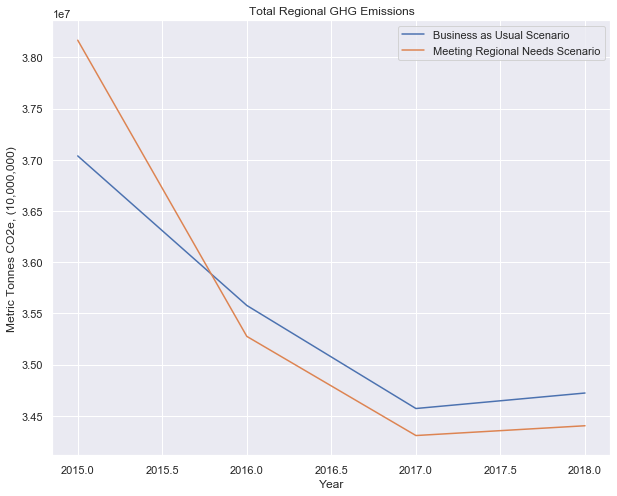

In [22]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_total_ghg", data=comparison_df,label = "Business as Usual Scenario")
ax = sns.lineplot(x="year", y="needs_total_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario")

ax.set_ylabel('Metric Tonnes CO2e, (10,000,000)')
ax.set_xlabel("Year")
ax.set_title('Total Regional GHG Emissions')
plt.show()
fig.savefig('total_ghg.png')

## Part B2. Create breakout ghg comparison line graphs

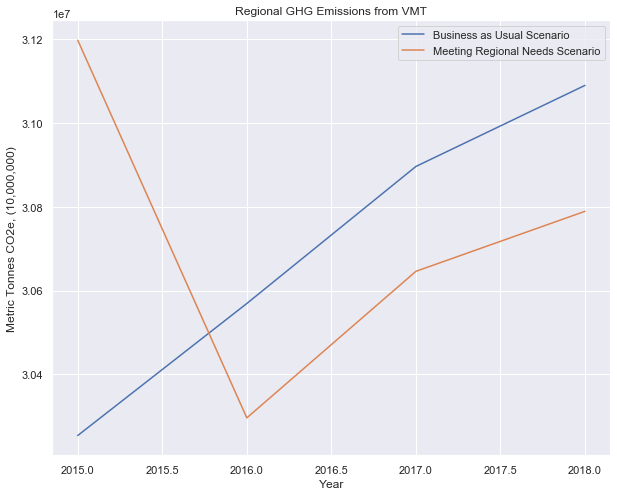

In [23]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_total_vmt_ghg", data=comparison_df,label = "Business as Usual Scenario")
ax = sns.lineplot(x="year", y="needs_total_vmt_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario")

ax.set_ylabel('Metric Tonnes CO2e, (10,000,000)')
ax.set_xlabel("Year")
ax.set_title('Regional GHG Emissions from VMT')
plt.show()
fig.savefig('vmt_ghg.png')

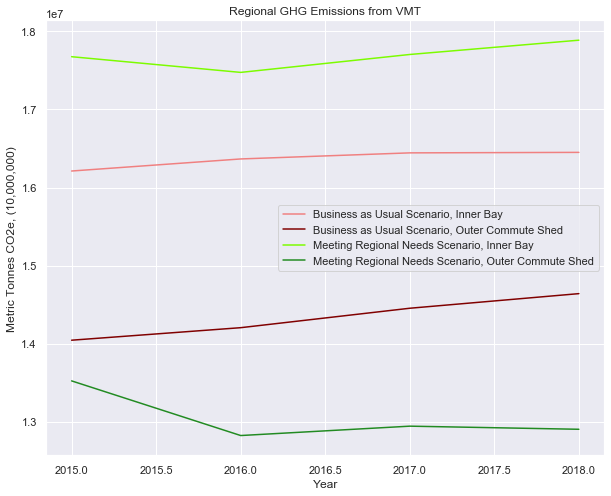

In [24]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_bay_vmt_ghg", data=comparison_df,label = "Business as Usual Scenario, Inner Bay", color="lightcoral")
ax = sns.lineplot(x="year", y="bas_outer_vmt_ghg", data=comparison_df,label = "Business as Usual Scenario, Outer Commute Shed",color="maroon")
ax = sns.lineplot(x="year", y="needs_bay_vmt_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario, Inner Bay",color="lawngreen")
ax = sns.lineplot(x="year", y="needs_outer_vmt_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario, Outer Commute Shed",color="forestgreen")

ax.set_ylabel('Metric Tonnes CO2e, (10,000,000)')
ax.set_xlabel("Year")
ax.set_title('Regional GHG Emissions from VMT')
plt.show()
fig.savefig('vmt_geo_ghg.png')

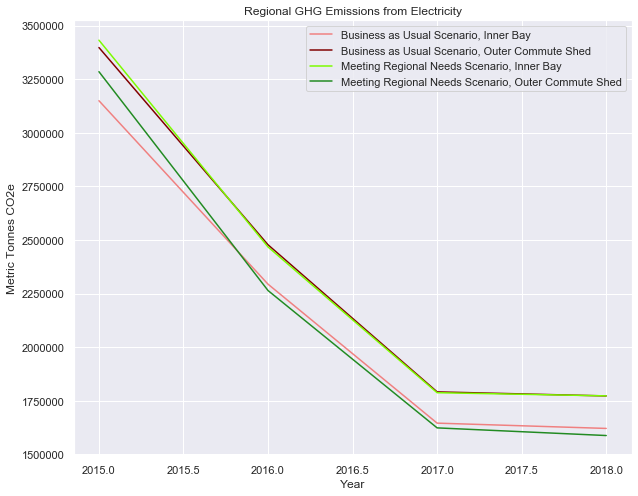

In [82]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_bay_electric_ghg", data=comparison_df,label = "Business as Usual Scenario, Inner Bay", color="lightcoral")
ax = sns.lineplot(x="year", y="bas_outer_electric_ghg", data=comparison_df,label = "Business as Usual Scenario, Outer Commute Shed",color="maroon")
ax = sns.lineplot(x="year", y="needs_bay_electric_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario, Inner Bay",color="lawngreen")
ax = sns.lineplot(x="year", y="needs_outer_electric_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario, Outer Commute Shed",color="forestgreen")

ax.set_ylabel('Metric Tonnes CO2e')
ax.set_xlabel("Year")
ax.set_title('Regional GHG Emissions from Electricity')
plt.show()

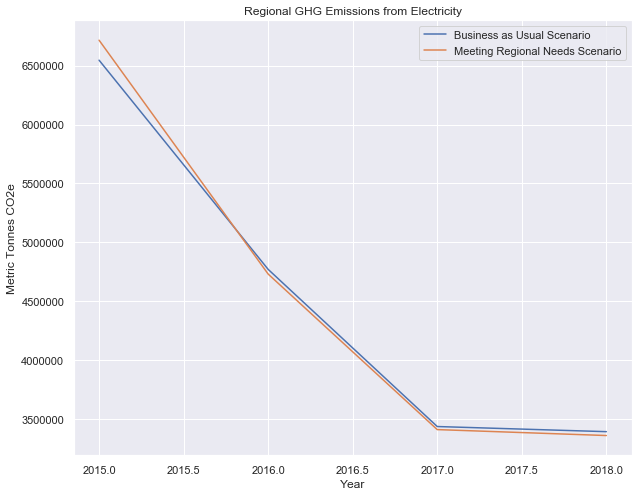

In [25]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_total_electric_ghg", data=comparison_df,label = "Business as Usual Scenario")
ax = sns.lineplot(x="year", y="needs_total_electric_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario")

ax.set_ylabel('Metric Tonnes CO2e')
ax.set_xlabel("Year")
ax.set_title('Regional GHG Emissions from Electricity')
plt.show()
fig.savefig('electric_ghg.png')

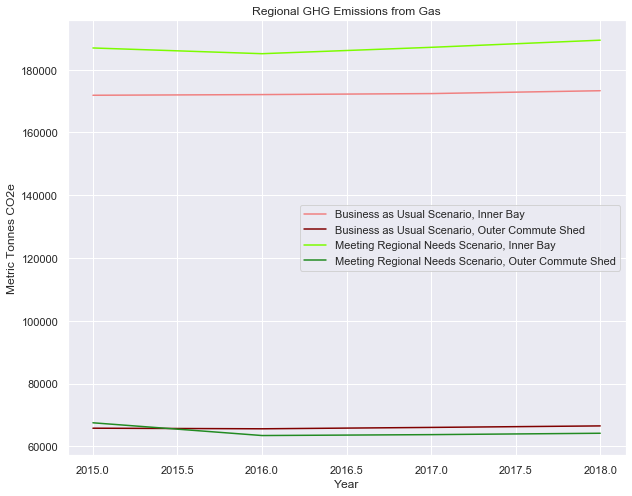

In [84]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_bay_gas_ghg", data=comparison_df,label = "Business as Usual Scenario, Inner Bay", color="lightcoral")
ax = sns.lineplot(x="year", y="bas_outer_gas_ghg", data=comparison_df,label = "Business as Usual Scenario, Outer Commute Shed",color="maroon")
ax = sns.lineplot(x="year", y="needs_bay_gas_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario, Inner Bay",color="lawngreen")
ax = sns.lineplot(x="year", y="needs_outer_gas_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario, Outer Commute Shed",color="forestgreen")

ax.set_ylabel('Metric Tonnes CO2e')
ax.set_xlabel("Year")
ax.set_title('Regional GHG Emissions from Gas')
plt.show()

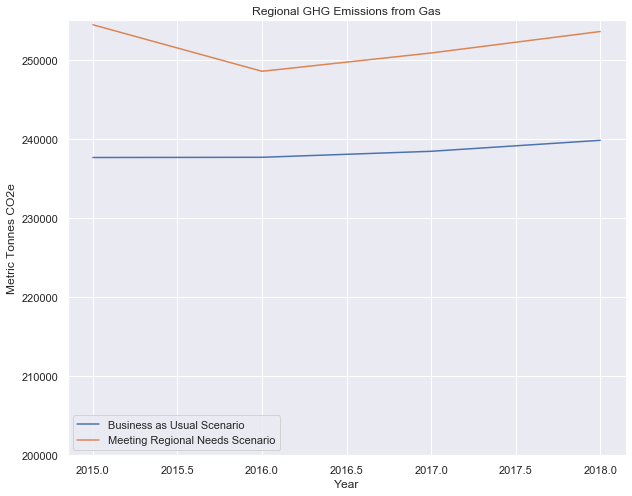

In [29]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x="year", y="bas_total_gas_ghg", data=comparison_df,label = "Business as Usual Scenario")
ax = sns.lineplot(x="year", y="needs_total_gas_ghg", data=comparison_df,label = "Meeting Regional Needs Scenario")

ax.set_ylabel('Metric Tonnes CO2e')
ax.set_xlabel("Year")
ax.set_title('Regional GHG Emissions from Gas')
plt.ylim(200000, 255000)
plt.show()
fig.savefig('gas_ghg.png')